In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import json
import os
import collections
import matplotlib.pyplot as plt
from pathlib import Path

# Plotting FIDS

In [2]:
# ## Just loading the fids
# location = "/usrhomes/g013/SemanticStyleGAN/fids/fids_v1.json"
# print(location)
# f = open(location)
# fids = json.load(f)
# print(fids)

In [3]:
#Funcrtiomn to sort a dictionary either based on keys or values
def save_sorted(location,sort_keys=True) -> dict:
    f = open(location)
    fids = json.load(f)
   
    if sort_keys:
        sorted_fids = sorted(fids.items(), key=lambda kv: kv[0])
    else:
        sorted_fids = sorted(fids.items(), key=lambda kv: kv[1])
    sorted_fids=collections.OrderedDict(sorted_fids)
   
    with open(location, 'w') as fp:
        json.dump(sorted_fids, fp)
    return sorted_fids

In [4]:
def plot_fids(location,save=False):
    sorted_fids=save_sorted(location,sort_keys=True)
    x_keys = np.fromiter(sorted_fids.keys(),dtype=float)/1000
    y_values = np.fromiter(sorted_fids.values(),dtype=float)
    plt.plot(x_keys,y_values)
    plt.yticks(np.arange(min(y_values),max(y_values),10))
    plt.xlabel("Iterations in Thousand")
    plt.ylabel("FID Values")
    plt.xticks(rotation='vertical')
    if save:
            location =Path(location)
            plt.savefig(str(location.parent/location.stem)+".png", bbox_inches='tight')
    else:
            plt.show()
    min_key = x_keys[np.where(y_values == np.amin(y_values))[0]][0]
    print(f" Minimum FID is {min(y_values)} at iteration {min_key}k")


 Minimum FID is 6.911313064841863 at iteration 170.0k


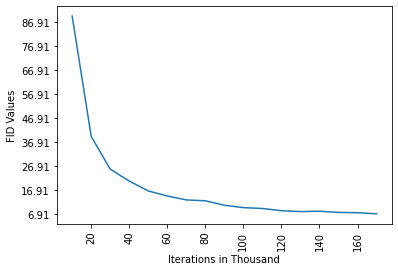

In [18]:
location = "/usr/stud/faragy/storage/user/main/faragy/stylegan2-pytorch/fids/fids_25k_16B.json"
plot_fids(location,save=True)


In [ ]:
min(x)